   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Accuracy: 0.9777777777777777

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


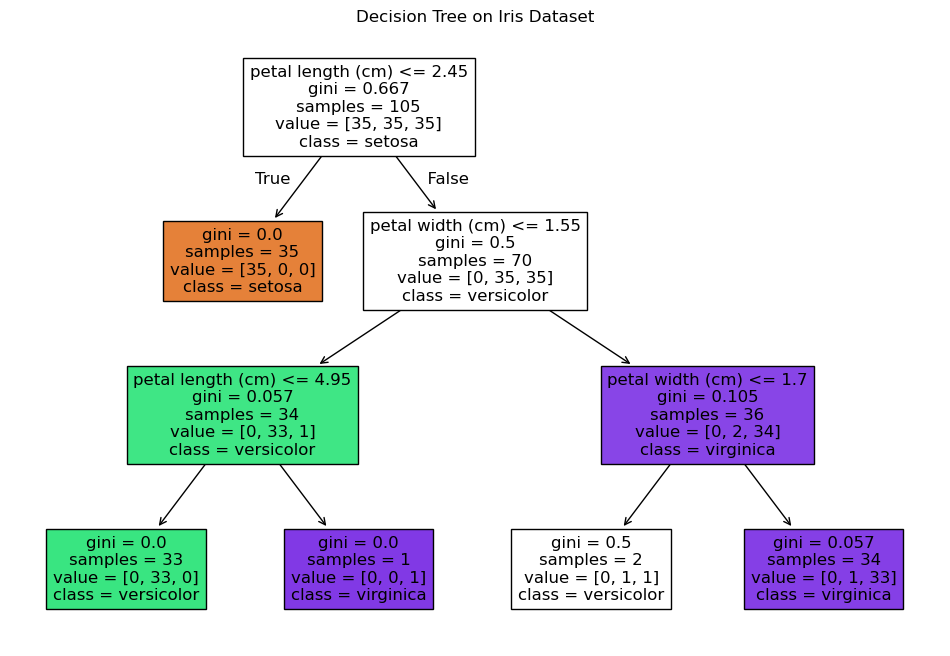

In [5]:
# decision tree - meaningful dataset (Iris)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Target')
print(X.head())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Create and fit Decision Tree classifier
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree on Iris Dataset')
plt.show()


In [8]:
'''
1. Write a program to predict heart disease (the target variable) based
on various health indicators using Logistic Regression Technique and evaluate its performance. 
Given a data set of 305 items.
data set - heart.csv

Note: The original problem asked for biking/smoking variables which don't exist in this dataset.
This has been adapted to work with the actual heart disease dataset available.
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load dataset
data = pd.read_csv('heart.csv')

# Display dataset info
print("Dataset shape:", data.shape)
print("\nDataset columns:", data.columns.tolist())
print("\nFirst few rows:")
print(data.head())

# Use multiple features for prediction (selecting relevant numerical features)
# age, sex, cp (chest pain), trestbps (blood pressure), chol (cholesterol), etc.
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']  # target: 1 = heart disease, 0 = no heart disease

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model (better for binary classification)
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Performance:')
print(f'Accuracy: {accuracy:.4f}')
print(f'\nClassification Report:')
print(classification_report(y_test, y_pred))
print(f'\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Feature importance (coefficients for logistic regression)
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
coefficients = model.coef_[0]
print(f'\nFeature Importance (Coefficients):')
for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef:.4f}')

Dataset shape: (303, 14)

Dataset columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

First few rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Model Performance:
Accuracy: 0.8852

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88     

/home/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
'''
2. Write a program to predict medical expenses (the dependent variable) based on the independent
variables, age, sex, bmi, children, smoker and region using Multiple Linear Regression
Technique and evaluate its performance. Given a data set of 1338 items.
data set - insurance.csv
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load dataset
data = pd.read_csv('insurance.csv')


# Create a copy for preprocessing
data_processed = data.copy()

# Encode categorical variables
# For 'sex': female = 0, male = 1
data_processed['sex'] = data_processed['sex'].map({'female': 0, 'male': 1})

# For 'smoker': no = 0, yes = 1  
data_processed['smoker'] = data_processed['smoker'].map({'no': 0, 'yes': 1})

# For 'region': use Label Encoding
le_region = LabelEncoder()
data_processed['region'] = le_region.fit_transform(data_processed['region'])

print("\nAfter encoding categorical variables:")
print(data_processed.head())

# Prepare features and target
X = data_processed[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data_processed['expenses']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Feature importance (coefficients)
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
coefficients = model.coef_
intercept = model.intercept_

print(f'\nModel Coefficients:')
print(f'Intercept: {intercept:.2f}')
for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef:.2f}')


After encoding categorical variables:
   age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86

Feature matrix shape: (1338, 6)
Target vector shape: (1338,)

Model Coefficients:
Intercept: -11951.68
age: 257.04
sex: -18.70
bmi: 335.94
children: 425.46
smoker: 23646.93
region: -271.22
